<a href="https://colab.research.google.com/github/suvashsumon/My_Thesis_Experiments/blob/main/Experiment_5_CNN_With_Extracted_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Using Time Domain Power Spectral Descriptors (TDPSD) Feature Set**  
**2. Using individual dataset**

In [4]:
!pip install libemg

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scipyio
import seaborn as sns
import pandas as pd
from libemg.feature_extractor import FeatureExtractor
from libemg.utils import get_windows
from google.colab import drive
import os
from sklearn.preprocessing import MinMaxScaler

**Reading Dataset**

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
gestures_label = {
	 'Thumb_UP' : 0,
	 'Index' : 1,
	 'Right_Angle' : 2,
	 'Peace' : 3,
	 'Index_Little' : 4,
	 'Thumb_Little' : 5,
	 'Hand_Close' : 6,
	 'Hand_Open' : 7,
	 'Wrist_Extension' : 8,
	 'Wrist_Flexion' : 9,
	 'Ulner_Deviation' : 10,
	 'Radial_Deviation' : 11
}

gestures = ['Thumb_UP', 'Index_Little', 'Right_Angle', 'Peace', 'Index', 'Thumb_Little', 'Hand_Close', 'Hand_Open',
	 'Wrist_Extension', 'Wrist_Flexion', 'Ulner_Deviation', 'Radial_Deviation'
]

In [8]:
persons = ["Arifa", "Arnob", "Ashis", "Bayezid", "Bushra", "Choity_new", "Eftekhar",
           "Fahim", "Humaid", "Humayun", "Johir", "Joy", "Mamun", "Noman", "Piyus", "Sazzad",
           "Shafi", "Shourav", "Tamim", "Wadud"]

In [9]:
def get_gesture_label(gesture):
  return gestures_label [gesture];

In [28]:
def scaleTo01(matrix):
  scaler = MinMaxScaler()
  scaler.fit(matrix)
  scaled_matrix = scaler.transform(matrix)
  return scaled_matrix

In [30]:
def feature_extraction(channelvalues, gesture, feature_list):
  # creating windows
  windows = get_windows(channelvalues, 50, 50)
  # extract feature
  fe = FeatureExtractor()
  features = fe.extract_features(feature_list, windows)
  # print(features.keys())
  #print("Len : "+str(len(features)))
  # creating feature matrixs
  extracted_feature_array = []
  extracted_gesture_array = []
  for i in range(33):
    features_matrix = []
    for abb in feature_list:
      features_matrix.append(features[abb][i])
    #print(features['MAV'].shape)
    #print(features['AR'].shape)
    #features_matrix = (features_matrix-np.min(features_matrix))/(np.max(features_matrix)-np.min(features_matrix))
    features_matrix = scaleTo01(features_matrix)
    extracted_feature_array.append(features_matrix)
    extracted_gesture_array.append(get_gesture_label(gesture))
  return extracted_feature_array, extracted_gesture_array

In [31]:
def get_processed_data(matfilepath, gesture):
  # read mat file
  matdata = scipyio.loadmat(matfilepath)
  # transpose the matrix
  values = np.transpose(matdata['value'])
  # remove the first 3000 values
  values = values[3000:]
  return feature_extraction(values, gesture, feature_list)


In [32]:
def get_input(persons, gestures, feature_list, orientaion="Rest"):
  input_array = []
  input_gest = []
  for person in persons:
    for gest in gestures:
      for i in range(5):
        matfilepath = "gdrive/My Drive/Forearm Invariant Data/"+person+"/"+orientaion+"/"+gest+"-"+str(i+1)+".mat"
        #print(matfilepath)
        processed_matrix, gesture_array = get_processed_data(matfilepath, gest)
        gest_label = get_gesture_label(gest)
        input_array = input_array + processed_matrix
        input_gest = input_gest + gesture_array
  return input_array, input_gest

In [33]:
feature_list = [
    'MAV',
    'SSC',
    'ZC',
    'WL',
    'LS',
    'MFL',
    'MSR',
    'WAMP',
    'RMS',
    'IAV',
    'DASDV',
    'VAR',
    'M0',
    'M2',
    'M4',
    'SPARSI',
    'IRF',
    # 'WLR',
    'LD',
]
X, Y = get_input(['Arifa'], gestures, feature_list)

In [34]:
len(X), len(Y)

(1980, 1980)

In [35]:
#
df = pd.DataFrame(X[0])
index = pd.Index(feature_list)
df = df.set_index(index)
df

,0,1,2,3,4,5,6,7
MAV,0.024665,0.025344,0.022485,0.021648,0.021486,0.022670,0.022661,0.020889
SSC,0.756067,0.875000,0.717363,0.574468,0.541637,0.644431,0.499987,0.659289
ZC,0.170627,0.225000,0.239055,0.212766,0.333290,0.311084,0.173892,0.382462
WL,0.037846,0.040991,0.069095,0.038730,0.054341,0.044429,0.056213,0.044787
LS,0.024533,0.025253,0.022257,0.021528,0.021286,0.022537,0.022424,0.020764
MFL,0.018061,0.020148,0.029012,0.019446,0.025087,0.022194,0.026074,0.021689
MSR,0.026388,0.026844,0.024366,0.023161,0.023262,0.024290,0.024582,0.022459
WAMP,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RMS,0.024754,0.025448,0.022717,0.021725,0.021665,0.022805,0.023010,0.021022
IAV,0.044158,0.042212,0.063787,0.039873,0.056580,0.046491,0.069057,0.042084


In [36]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((1980, 18, 8), (1980,))

**Model Building**

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X,Y,
    test_size = .2, shuffle=True, random_state=0
)

In [38]:
len(x_train), len(y_train)

(1584, 1584)

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the input shape
input_shape = x_train[0].shape

# Create a Sequential model
model = Sequential()

# Add a Conv1D layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

# Add a MaxPooling1D layer (optional)
model.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding it to a Dense layer
model.add(Flatten())

# Add a Dense layer
model.add(Dense(64, activation='relu'))

# Add a Dense layer
model.add(Dense(32, activation='relu'))

# Add a Dense layer
model.add(Dense(16, activation='relu'))

# Output layer for classification (adjust units according to the number of classes)
# Assuming classes are integers starting from 0
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 16, 32)            800       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                      

In [40]:
# Fit the model with training data
history = model.fit(x_train, y_train, epochs=70, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/70
50/50 [==============================] - 1s 8ms/step - loss: 2.4770 - accuracy: 0.0871 - val_loss: 2.4685 - val_accuracy: 0.1465
Epoch 2/70
50/50 [==============================] - 0s 5ms/step - loss: 2.4208 - accuracy: 0.1742 - val_loss: 2.3652 - val_accuracy: 0.1515
Epoch 3/70
50/50 [==============================] - 0s 4ms/step - loss: 2.2432 - accuracy: 0.1837 - val_loss: 2.1623 - val_accuracy: 0.1566
Epoch 4/70
50/50 [==============================] - 0s 4ms/step - loss: 2.0404 - accuracy: 0.2197 - val_loss: 1.9586 - val_accuracy: 0.2778
Epoch 5/70
50/50 [==============================] - 0s 4ms/step - loss: 1.9108 - accuracy: 0.2658 - val_loss: 1.8645 - val_accuracy: 0.2955
Epoch 6/70
50/50 [==============================] - 0s 4ms/step - loss: 1.8126 - accuracy: 0.3283 - val_loss: 1.7664 - val_accuracy: 0.3308
Epoch 7/70
50/50 [==============================] - 0s 4ms/step - loss: 1.7535 - accuracy: 0.3226 - val_loss: 1.7110 - val_accuracy: 0.3662
Epoch 8/70
50/50 [==

**Classification Report**

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : ")
print(classification_report(y_test, y_pred_classes))

13/13 [==============================] - 0s 2ms/step
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        42
           1       0.61      0.59      0.60        29
           2       0.88      0.72      0.79        32
           3       0.61      0.63      0.62        30
           4       0.58      0.69      0.63        32
           5       0.63      0.83      0.72        29
           6       0.63      0.59      0.61        29
           7       0.69      0.88      0.77        33
           8       0.97      1.00      0.99        36
           9       1.00      0.81      0.89        31
          10       0.93      0.78      0.85        36
          11       0.97      1.00      0.99        37

    accuracy                           0.77       396
   macro avg       0.78      0.77      0.77       396
weighted avg       0.79      0.77      0.77       396



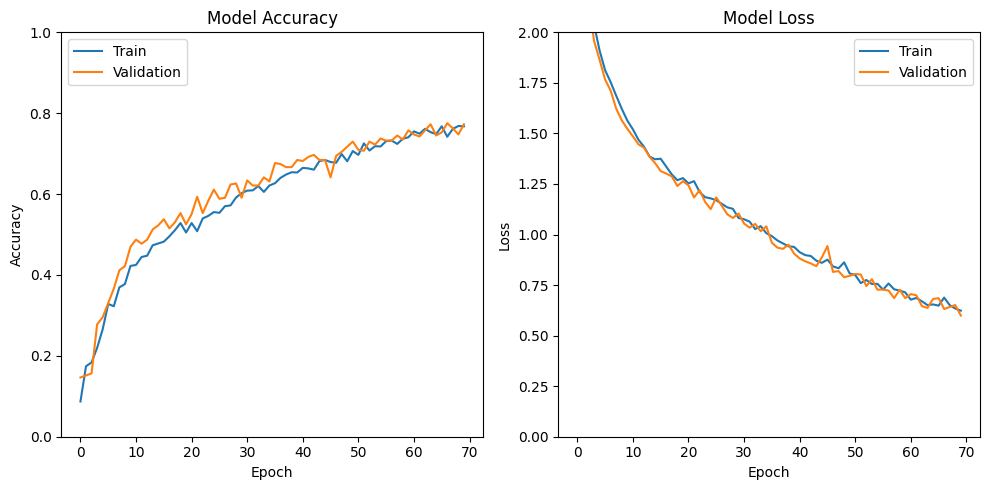

In [42]:
# Plotting model accuracy and loss
def plot_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.ylim(0, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.ylim(0, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

**Validation with Pronation Data**

In [43]:
x_pronation, y_pronation = get_input(['Arifa'], gestures, "Pronation")
x_pronation = np.array(x_pronation)
y_pronation = np.array(y_pronation)

In [44]:
pronation_results = model.evaluate(x_pronation, y_pronation, batch_size=32)
print(pronation_results)

62/62 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7949
[0.580036997795105, 0.794949471950531]


**Validation with Supination Data**

In [45]:
x_supination, y_supination = get_input(['Arifa'], gestures, "Supination")
x_supination = np.array(x_supination)
y_supination = np.array(y_supination)

In [46]:
supination_results = model.evaluate(x_supination, y_supination, batch_size=32)
print(supination_results)

62/62 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7949
[0.580036997795105, 0.794949471950531]
